In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [4]:
len(base_model.layers)

311

In [5]:
names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']

In [6]:
base_model.input

<KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [7]:
layers = [base_model.get_layer(nome).output for nome in names]
layers

[<KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, ragged=False, name=keras_tensor_100>,
 <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, ragged=False, name=keras_tensor_164>,
 <KerasTensor shape=(None, None, None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_248>,
 <KerasTensor shape=(None, None, None, 2048), dtype=float32, sparse=False, ragged=False, name=keras_tensor_279>]

In [8]:
deep_dream_model = tf.keras.Model(inputs = base_model.input, outputs = layers)

In [9]:
deep_dream_model.output

[<KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, ragged=False, name=keras_tensor_100>,
 <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, ragged=False, name=keras_tensor_164>,
 <KerasTensor shape=(None, None, None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_248>,
 <KerasTensor shape=(None, None, None, 2048), dtype=float32, sparse=False, ragged=False, name=keras_tensor_279>]

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
!unzip gdrive/MyDrive/homer_bart_1.zip

Archive:  gdrive/MyDrive/homer_bart_1.zip
   creating: homer_bart_1/
  inflating: __MACOSX/._homer_bart_1  
  inflating: homer_bart_1/homer38.bmp  
  inflating: __MACOSX/homer_bart_1/._homer38.bmp  
  inflating: homer_bart_1/bart58.bmp  
  inflating: __MACOSX/homer_bart_1/._bart58.bmp  
  inflating: homer_bart_1/bart70.bmp  
  inflating: __MACOSX/homer_bart_1/._bart70.bmp  
  inflating: homer_bart_1/homer10.bmp  
  inflating: __MACOSX/homer_bart_1/._homer10.bmp  
  inflating: homer_bart_1/bart64.bmp  
  inflating: __MACOSX/homer_bart_1/._bart64.bmp  
  inflating: homer_bart_1/homer119.bmp  
  inflating: __MACOSX/homer_bart_1/._homer119.bmp  
  inflating: homer_bart_1/bart162.bmp  
  inflating: __MACOSX/homer_bart_1/._bart162.bmp  
  inflating: homer_bart_1/homer124.bmp  
  inflating: __MACOSX/homer_bart_1/._homer124.bmp  
  inflating: homer_bart_1/bart65.bmp  
  inflating: __MACOSX/homer_bart_1/._bart65.bmp  
  inflating: homer_bart_1/bart71.bmp  
  inflating: __MACOSX/homer_bart_1/._b

In [20]:
import tensorflow as tf

image = tf.keras.preprocessing.image.load_img(
    '/content/homer_bart_1/homer26.bmp',
    target_size=(350, 375)
)


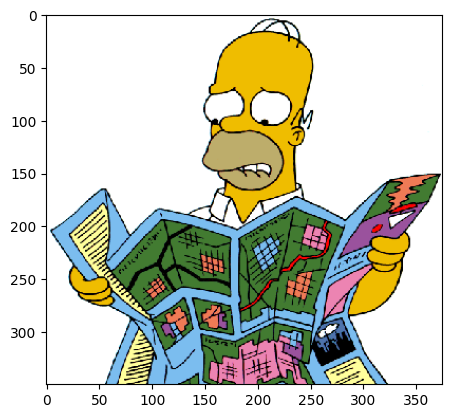

In [22]:
plt.imshow(image);

In [23]:
type(image)

PIL.Image.Image

In [24]:
image.size

(375, 350)

In [25]:
image = tf.keras.preprocessing.image.img_to_array(image)

In [26]:
type(image)

numpy.ndarray

In [27]:
image.shape

(350, 375, 3)

In [28]:
image = tf.keras.applications.inception_v3.preprocess_input(image)

In [29]:
image.min(), image.max()

(np.float32(-1.0), np.float32(1.0))

Neural Network Activations

In [30]:
image_batch = tf.expand_dims(image, axis = 0)
image_batch.shape

TensorShape([1, 350, 375, 3])

In [31]:
activations = deep_dream_model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [32]:
len(activations)

4

Error calculation (loss)


In [33]:
def calculate_error(image, network):
  image_batch = tf.expand_dims(image, axis = 0)
  activations = network(image_batch)
  mistakes = []
  for activation in activations:
    media = tf.math.reduce_mean(activation)
    mistakes.append(media)

  return tf.reduce_sum(mistakes)

In [34]:
loss = calculate_error(image, deep_dream_model)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.9015965461730957>

Gradient climb

In [35]:
@tf.function
def deep_dream(network, image, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(image)
    mistakes = calculate_error(image, network)

  gradientes = tape.gradient(mistakes, image)
  gradientes /= tf.math.reduce_std(gradientes)
  image = image + gradientes * learning_rate
  image = tf.clip_by_value(image, -1, 1)

  return mistakes, image

In [36]:
def convert_image(image):
  image = 255 * (image + 1.0) / 2.0
  return tf.cast(image, tf.uint8)

In [37]:
def run_deep_dream(network, image, epochs, learning_rate):
  for epoch in range(epochs):
    erro, image = deep_dream(network, image, learning_rate)
    if epoch % 200 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(convert_image(image))
      plt.show()
      print('Época {}, loss {}'.format(epoch, erro))

Generation of Images


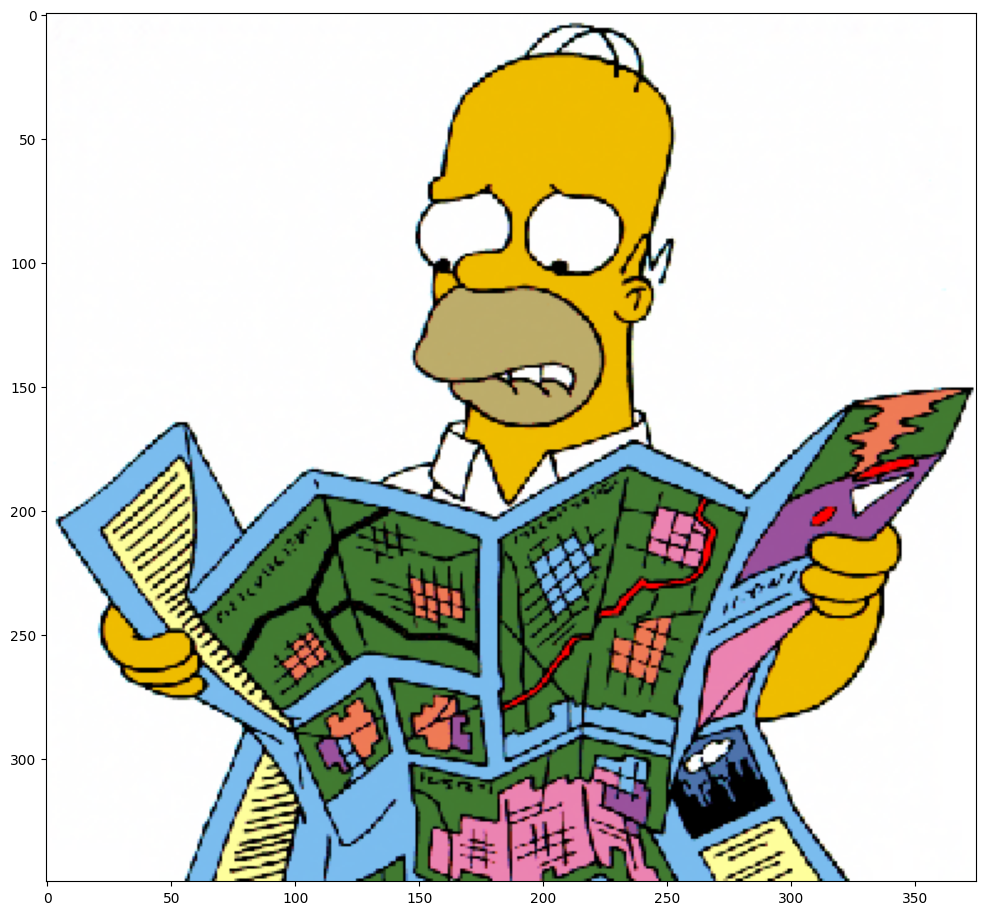

Época 0, loss 0.9015965461730957


In [40]:
run_deep_dream(deep_dream_model, image, 1, 0.001)


# Running DeepDream with only 1 iteration because my laptop can't handle heavy processing.
# If your system is powerful enough, you can use the original setting:
# run_deep_dream(deep_dream_model, image, 8000, 0.001)
run_deep_dream(deep_dream_model, image, 1, 0.001)
